In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/Users/om/Desktop/My Mac/My_Assignment Data/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data["income"]="<=30000"
data.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

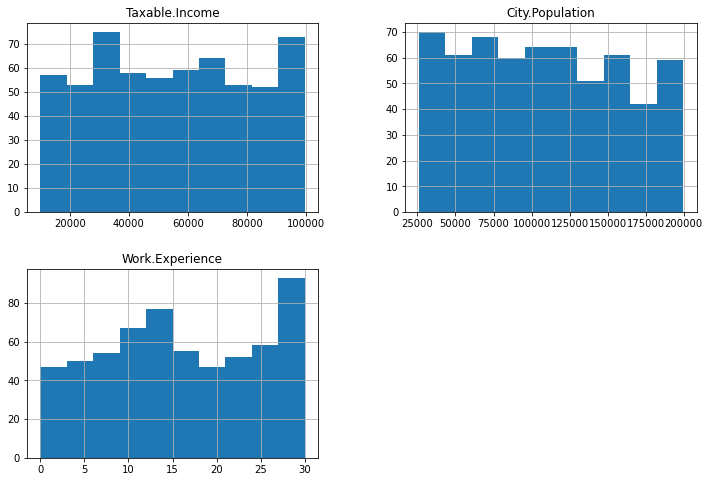

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(12,8))

## `Renaming Columns`

In [8]:
data.rename(columns={"Marital.Status":"Marital_status","Taxable.Income":"Taxable_income","City.Population":"City_population","Work.Experience":"Work_experience"},inplace=True)
data

,Undergrad,Marital_status,Taxable_income,City_population,Work_experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


## `Creating dummy variable for categorical data`

In [9]:
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [10]:
DF=pd.Series(data['Taxable_income'])
su=[]
for i in DF:
    if i<=30000:
        su.append("risky")
    else:
        su.append('good')
print(su)

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

## `Droping the Taxable Income`

In [11]:
data.drop(["Taxable_income"],axis=1, inplace=True)

In [12]:
X = data[['Undergrad','Marital_status','City_population','Work_experience','Urban']]
Y = data["income"]
X

,Undergrad,Marital_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


## `Bagged Decision Tree for Classification`

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

seed= 7
kfold= KFold(n_splits=10, random_state=seed, shuffle=True)
cart= DecisionTreeClassifier()
num_trees=100
model= BaggingClassifier(
base_estimator=cart, n_estimators=num_trees, random_state=seed)
result= cross_val_score(model, X, Y, cv= kfold)
print(result.mean())

0.7433333333333333


## `Random Forest Classification`

In [14]:
num_trees=100
max_features=3
kfold= KFold(n_splits=10, random_state=7, shuffle=True)
model= RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
result= cross_val_score(model, X,Y, cv=kfold)
print(result.mean())

0.7433333333333333


## `AdaBoost Classification`

In [15]:
from sklearn.ensemble import AdaBoostClassifier
num_trees= 10
seed=7
kfold= KFold(n_splits=10, random_state=seed, shuffle=True)
model= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result= cross_val_score(model, X, Y, cv= kfold)
print(result.mean())

0.7933333333333332


# <span style='background:yellow'> Random Forest using splitting the data </span>

## `Splitting the data into train and test dataset`

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [17]:
RF = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [18]:
RF.fit(x_train,y_train)
RF.estimators_ 
RF.classes_ 
RF.n_classes_ 
RF.n_features_  
RF.oob_score_ 
RF.n_outputs_ 

1

In [19]:
prediction = RF.predict(x_train)
accuracy = accuracy_score(y_train,prediction)
np.mean(prediction == y_train)

0.9875

In [20]:
from sklearn.metrics import classification_report
print(classification_report(prediction,y_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       387
           1       0.94      1.00      0.97        93

    accuracy                           0.99       480
   macro avg       0.97      0.99      0.98       480
weighted avg       0.99      0.99      0.99       480



### `Random Forest Classifiaction model giving accuracy of 74.33% & AdaBoost Classifiaction model giving the Accuracy of 79.33%`